___

# Atividade - Regressão Linear Simples
___

## Aula 26

<div id="indice"></div>

## Índice

- [Renda vs CO2](#base)
    - [Dados: Inner Join](#join)
    - [Problema](#problema)
- [Ajustando um modelo de regressão simples via Mínimos Quadrados](#regressao)
    - [Suposições do modelo](#suposicoes)
    - [Exercício 1 - $\hat{\beta}_1$ e  $\hat{\beta}_0$](#ex1)
    - [Verificando os resultados da regressão](#verificando-resultados)
    - [Exercício 2 - Resíduos ](#ex2)
- [Ajustando um modelo de regressão simples via `statsmodels.OLS`](#ols)
    - [Teste de hipóteses para os coeficientes](#th-coefs)
    - [Usando `statsmodels.OLS`](#usando-ols)
    - [Exercício 3 - Plot da reta ajustada](#ex3)
    - [Exercício 4 - Resíduos](#ex4)
    - [Exercício 5](#ex5)
- [Explicação sobre resultados e suposições do modelo de regressão linear:](#explica)
    - [Teste t :  valor-*p*  da estatística t](#testet)
    - [Coeficiente de determinação $R^2$](#r2)
    - [$R^2$ ajustado](#r2adj)
    - [Estatística F](#f)
    - [Teste Omnibus](#omnibus)
    - [Teste Jarque-Bera](#jb)
    - [Teste Durbin-Watson](#dw)
- [Utilização dos resultados e validação das suposições do modelo:](#uso)    
    - [Exercício 6 - Análise dos valores p](#ex6)
    - [Exercício 7 - Análise da estatística F](#ex7)
    - [Exercício 8 - Análise do $R^2$](#ex8)
    - [Exercício 9 - Análise de normalidade do resíduo](#ex9)
    - [Exercício 10 - Análise de homocedasticidade](#ex10)
___

___

<div id="base"></div>

# Renda vs CO2

Vamos trabalhar com os seguintes dados coletados do site https://www.gapminder.org/:
1. Emissão de CO2 per capita
1. Renda per capita

As linhas representam os países e as colunas representam a emissão de CO2 ou renda per capita em cada ano. Estamos interessados em investigar a relação entre essas variáveis.

Como os arquivos estão separados, será preciso juntá-los cruzando o país.

In [1]:
%matplotlib inline
import pandas as pd

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# A maneira como vc apresneta os dados vai ser bastnate importante para as conclusoes que chega e deixa de chegar.
#  O circunflexo (chapeu) significa que é estimado. --> ^y
# Yi é um valor real por ex


In [3]:
#Leitura dos arquivos em Excel
co2 = pd.read_excel('indicator CDIAC carbon_dioxide_emissions_per_capita.xlsx')
income = pd.read_excel('indicator gapminder gdp_per_capita_ppp.xlsx')

In [4]:
#É possível verificar que cada linha representa um país e as colunas representam o ano
co2.head(3)

,CO2 per capita,1751.0,1755.0,1762.0,1763.0,1764.0,1765.0,1766.0,1767.0,1768.0,...,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.03678,0.04709,0.068312,0.131602,0.213325,0.262174,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#O mesmo se aplica a renda.
income.head(3)

,GDP per capita,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


___

<div id="join"></div>

### Dados: Inner Join

Vamos agora juntar as duas tabelas via país, selecionar apenas o ano de 2010 e remover os NaNs.

Ao final vamos fazer o gráfico de dispersão das duas variáveis.

**Sugestão**: pesquise sobre a função DataFrame.join(), pode ser muito útil no futuro.

In [6]:
#Cruza as duas tabelas via país
co2_index = co2.set_index('CO2 per capita')
income_index = income.set_index('GDP per capita')

df = co2_index.join(income_index, how='inner', lsuffix='_co2', rsuffix='_income')

In [7]:
#Seleciona o ano de 2010 e remove os NaNs
df = df[['2010.0_co2','2010.0_income']].dropna()
df.head()

,2010.0_co2,2010.0_income
Afghanistan,0.262174,1637.0
Albania,1.336544,9374.0
Algeria,3.480977,12494.0
Andorra,6.092100,38982.0
Angola,1.593918,7047.0


In [8]:
df.columns = ['2010_co2','2010_income']

In [9]:
#Transforma a renda na escala de milhares de dólares
df['2010_income'] /= 1000
df.head()

,2010_co2,2010_income
Afghanistan,0.262174,1.637
Albania,1.336544,9.374
Algeria,3.480977,12.494
Andorra,6.092100,38.982
Angola,1.593918,7.047


___

<div id="problema"></div>

### Problema

Considere que o objetivo aqui seja **explicar/prever** a emissão de gás carbono (CO2) per capita de um país em função da renda (PIB) per capita.

Por conta disso, vamos considerar `CO2` como variável dependente (ou variável resposta ou variável *target*) para ser considerada no `eixo y` e `renda` como independente (ou explicativa ou *features*) no `eixo x`.

Proponha um gráfico para visualizar a relação entre essas variáveis.

In [10]:
# ESCREVA SEU CÓDIGO AQUI

In [11]:
# Conforme há um aumento na renda per capita há um aumento na emissão de CO2.

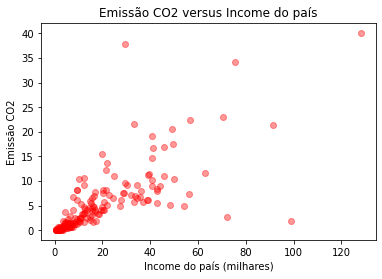

In [12]:
plt.scatter(y=df['2010_co2'], x=df['2010_income'], c='red', alpha=0.4)
plt.title('Emissão CO2 versus Income do país')
plt.ylabel('Emissão CO2')
plt.xlabel('Income do país (milhares)')
plt.show()

___

<div id="regressao"></div>

# Ajustando um modelo de regressão simples via Mínimos Quadrados

Vamos tentar agora ajustar um modelo sobre os dados. A primeira tentativa será ajustar um reta:

$$y_i=\beta_0+\beta_1x_i+\varepsilon_i$$

Onde:
1. $\beta_i$ são os coeficientes do modelo de regressão;
1. $\varepsilon_i$ representa os **erros aleatórios**. O erro aleatório tem média zero e variância (desconhecida) $\sigma^2$. Além disso, esses erros aleatórios correspondentes as diferentes observações são também considerados variáveis aleatórias não correlacionadas. Vide Montegomery e Runger (2018), Seção 11-2, página 335.

O primeiro passo agora é calcular os valores da regressão. Existem diversas formas de estimar os $\beta$s, vamos utilizar o método de **Mínimos Quadrados Ordinários (MQO ou OLS - Ordinary Least Squares em inglês)**. 

$$\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}$$

$$\hat{\beta}_1=\frac{S_{XY}}{S_{XX}}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$

<div id="suposicoes"></div>

### Suposições do modelo

Para podermos aplicar o modelo é necessário fazermos algumas suposições:

1. Os **erros têm distribuição normal** com média 0 e variância constante, ou seja, $\varepsilon_i \sim N(0, \sigma^2)$.
2. Os **erros são independentes** entre si, ou seja, $Corr(\varepsilon_i, \varepsilon_j)=0$, para qualquer $i \neq j$.
3. **O modelo é linear nos parâmetros**.
4. **Homocedasticidade: $Var(\varepsilon_i) = \sigma^2$** para qualquer $i = 1, \dots, n$.

___

<div id="ex1"></div>

### EXERCÍCIO 1 - $\hat{\beta}_1$ e  $\hat{\beta}_0$

Calcule os valores de $\bar{x}$ e $\bar{y}$. Calcule também $S_{XX}$ e $S_{XY}$, em seguida calcule o $\hat{\beta}_1$ e o $\hat{\beta}_0$. Armazene os resultados de $\hat{\beta}_1$ e $\hat{\beta}_0$ nas variáveis `b1` e `b0`, respectivamente.

In [13]:
# ESCREVA SEU CÓDIGO AQUI
dados_x = df['2010_income']
dados_y = df['2010_co2']
n = df.shape[0] # numero de linhas, se quiser o número de colunas é só colocar df.shape[1]

x_barra = np.mean(dados_x)
y_barra = np.mean(dados_y)

Sxy_cov = np.sum((dados_x - x_barra)*(dados_y - y_barra))
Sxx_var = np.sum((dados_x - x_barra)**2)

b1 = Sxy_cov/Sxx_var
b0 = y_barra - b1*x_barra

print(f'Beta1 é {b1}')
print(f'Beta0 é {b0}')

Beta1 é 0.24326849086184094
Beta0 é 0.6557309117836843


<div id="verificando-resultados"></div>

### Verificando os resultados da regressão

Vamos contrastar a reta estimada pelo modelo de regressão com os dados observados.

Para tanto, serão construídos:
 * `x_vec`: vetor de valores considerando a amplitude dos dados que estão no `eixo x`
 * `y_vec`: vetor com valores ajustados para y a partir de um valor de `x_vec`, considerando os coeficentes da reta

In [14]:
# Exemplo de regressão linear simples
x_pais = 40
y_pais = b0 + b1*x_pais
print(f'Para um país com renda {x_pais}, o meu modelo estimou emissao de co2 de {y_pais}')

Para um país com renda 40, o meu modelo estimou emissao de co2 de 10.386470546257321


In [15]:
# Escreva seu codigo aqui
x_vec = np.linspace(dados_x.min(), dados_x.max(), 50)
y_vec = b0 + b1*x_vec

**Gráfico com os pontos observados e a reta ajustada:**

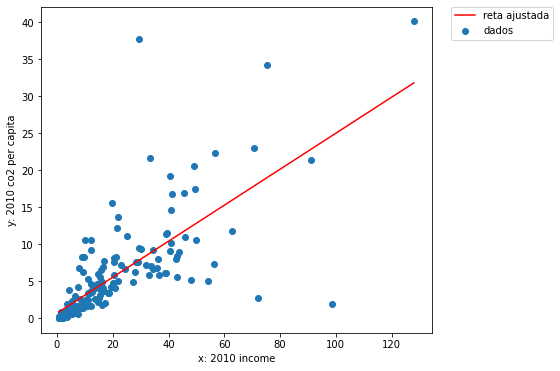

In [16]:
# É necessário ter os objetos x_vec e y_vec calculados:
plt.figure(figsize=(7,6))
plt.plot(x_vec,y_vec, color="r") # resultados da regressão
plt.scatter(dados_x, dados_y); # dados
plt.xlabel("x: 2010 income")
plt.ylabel("y: 2010 co2 per capita")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

___

<div id="ex2"></div>

### EXERCÍCIO 2 - Resíduos 

Agora calcular o vetor de resíduos, dado por:
$$e_i=y_i-\hat{y_i}=y_i-(\hat{\beta}_0+\hat{\beta}_1x_i)$$

Ou seja, resíduo indica o que cada valor observado em $y$ ficou distante do valor previsto pela reta $\hat{y}$.

**Verifique GRAFICAMENTE a normalidade dos resíduos. Parece uma Normal?**

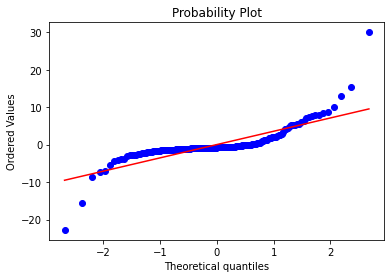

In [17]:
# ESCREVA SEU CÓDIGO AQUI
vetor_residuos = dados_y - (b0 + b1*dados_x)
a = stats.probplot(vetor_residuos, dist="norm", plot=plt)

Pela análise do gráfico, é possível adimitir que a distribuição dos resíduos não é normal, visto que os pontos estão distantes da linha de tendência. 

___

<div id="ols"></div>

# Ajustando um modelo de regressão simples via `statsmodels.OLS`

<div id="th-coefs"></div>

### Teste de hipóteses para os coeficientes 

Agora que já aprendemos Teste de Hipóteses, podemos verificar a significância dos $\beta$'s e para tal vamos testar:

$$H_0: \beta_i=0$$
$$H_1: \beta_i\neq0$$

com $i=0$ e $i=1$. A **significância da regressão** está na rejeição de $H_0: \beta_1=0$, pois isso torna a variável descrita em $x$ relevante ao modelo para melhor prever a variável descrita em $y$.


Verifique os resultados da regressão obtidos considerando o comando `OLS` contido no pacote `statsmodelos.api`.

Considerando os resultados desse ajuste obtido pelo `summary`, responda os exercícios.

___

<div id="usando-ols"></div>

### Usando `statsmodels.OLS`

Agora que estão familiarizados com algumas medidas obtidas na "unha" calculando $\hat{beta}_0$ e $\hat{beta}_1$ com as expressões obtidas pelo método dos mínimos quadrados, vamos aprender como utilizar a função `OLS()` da biblioteca `statsmodel` e interpretar os resultados.

In [18]:
import statsmodels.api as sm # Importe da biblioteca

In [19]:
# Repetindo - mas já fizemos isso anteriormente
x_dados = df['2010_income'] # Definindo renda como explicativa
y_dados = df['2010_co2']    # Definindo CO2 como resposta

# Matriz de 1s e valores de x_dados
X_dados = sm.add_constant(x_dados) # Adiciona coluna de 1s para estimar intercepto junto com a coluna de x (dados)

c:\Users\carol\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
# Define o modelo
model = sm.OLS(y_dados, X_dados)    

# Faz o ajuste
results = model.fit()   

# Mostra os resultados
results.summary()       

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               2010_co2   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     235.2
Date:                Thu, 08 Dec 2022   Prob (F-statistic):           9.80e-35
Time:                        11:53:56   Log-Likelihood:                -534.72
No. Observations:                 186   AIC:                             1073.
Df Residuals:                     184   BIC:                             1080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6557      0.423      1.551      0.123      -0.178       1.490
2010_income     0.2433      0.016     15.337      0.000       0.212       0.275
==============================================================================
Omnibus:                      100.299   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2384.399
Skew:                           1.435   Prob(JB):                         0.00
Kurtosis:                      20.304   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**AGORA USE A SAIDA do OLS Regression Results**

Como resultado do `statsmodels.OLS` obtivemos a tabela acima, que contém diversas informações e pode ser um pouco intimidadora em um primeiro contato. Inicialmente estamos interessados apenas nos valores de $\hat\beta_0$ (intercepto: `const`) e $\hat\beta_1$ (inclinação da reta: `2010_income`). Esses valores podem ser encontrados na coluna `coef` do *output* do OLS Regression Results. Posteriormente vamos entender algumas das outras informações disponíveis nesse resultado.

In [21]:
beta0 = results.params['const']
beta1 = results.params['2010_income']

print(f'Estimativa de beta0 (coeficente linear):  {beta0}')
print(f'Estimativa de beta1 (coeficente angular): {beta1}')

Estimativa de beta0 (coeficente linear):  0.655730911783684
Estimativa de beta1 (coeficente angular): 0.24326849086184088


___

<div id="ex3"></div>

### EXERCÍCIO 3 - Plot da reta ajustada

Usando os resultados da equação obtida via `statsmodels`, plote novamente a reta ajustada sobre os pontos. 

**Dica 1**: você pode utilizar o `results.predict` (consulte a documentação).

**Dica 2**: para usar essa função você pode precisar do `sm.add_constant` (utilizado [aqui](usando-ols)).

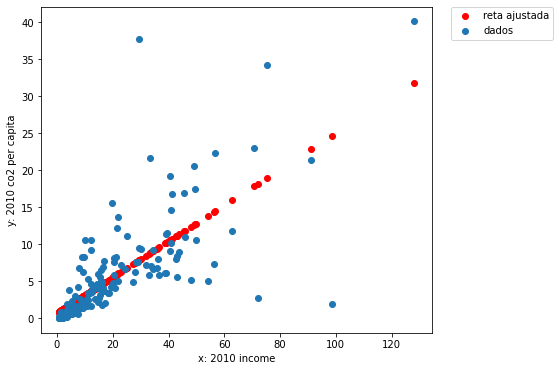

In [22]:
# ESCREVA SEU CÓDIGO AQUI
novo_x = x_dados
novo_y = beta0 + beta1*novo_x 

plt.figure(figsize=(7,6))
plt.scatter(novo_x,novo_y, color="r") # resultados da regressão
plt.scatter(dados_x, dados_y); # dados
plt.xlabel("x: 2010 income")
plt.ylabel("y: 2010 co2 per capita")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

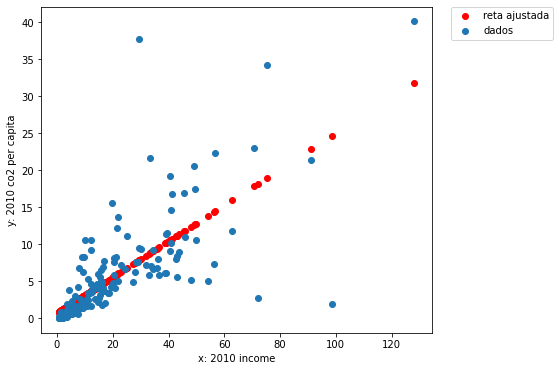

In [38]:

Y_dados = results.predict(X_dados)
plt.figure(figsize=(7,6))
plt.scatter(x_dados,Y_dados, color="r") # resultados da regressão
plt.scatter(dados_x, dados_y); # dados
plt.xlabel("x: 2010 income")
plt.ylabel("y: 2010 co2 per capita")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

<div id="ex4"></div>

### EXERCÍCIO 4 - Resíduos

Gere o `probplot` dos resíduos para verificar a sua normalidade.

**Dica**: Você pode obter o valor dos resíduos no atributo `resid` dos resultados da regressão (`results.resid`).

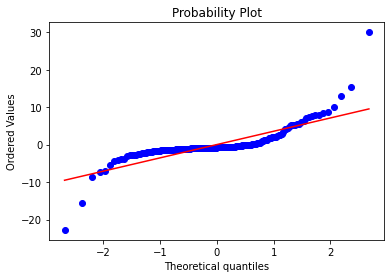

In [39]:
# ESCREVA SEU CÓDIGO AQUI
b = stats.probplot(results.resid, dist="norm", plot=plt)

___

<div id="ex5"></div>

### EXERCÍCIO 5 

Interprete os resultados acima. Você acha que os resíduos formam uma normal? Discuta a homocedasticidade do modelo (a variância dos erros é constante?).

In [40]:
# ESCREVA SUA RESPOSTA AQUI
# O modelo não é adequado para os dados, pois os resíduos não seguem uma distribuição normal, já que seus pontos não estão alinhados com a linha vermelha. Além disso, a variancia dos resíduos não é constante.	

___

<div id="explica"></div>

# Explicação sobre resultados e suposições do modelo de regressão linear:

Os resumo dos resultados da regressão traz informações que nos permitem avaliar a qualidade do ajuste e a validade de:

* Validação das suposições (normalidade, homocedasticidade e independência dos resíduos)
* Teste de hipóteses dos coeficientes do modelo de regressão 

<div id="testet"></div>

### Teste t :  valor-*p*  da estatística t

Existente para cada coeficiente $\beta_i$ do modelo de regressão, testam as seguintes hipóteses:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Um valor-*p* (encontrado na coluna `P>|t|`) baixo permite **rejeitar** a hipótese $H_0: \beta_i = 0$. No caso de um modelo de regressão simples, as hipóteses para o coeficiente $\beta_1$ dizem sobre a significância da regressão.

In [25]:
valorp_beta0 = results.pvalues['const']
valorp_beta1 = results.pvalues['2010_income']

print(f'Valor-p sob H0: beta0 = 0: {valorp_beta0:.6f}')
print(f'Valor-p sob H0: beta1 = 0: {valorp_beta1:.6f}')

Valor-p sob H0: beta0 = 0: 0.122661
Valor-p sob H0: beta1 = 0: 0.000000


<div id="r2"></div>

### Coeficiente de determinação $R^2$

É uma medida de quão bem uma regressão capta a variação presente nos dados, ou parafraseando, o quanto de variabilidade nos dados é explicada pelo modelo de regressão.

$$ R^2 = 1 - \frac{SS_E}{SS_T}$$

Para calcular esta fórmula precisamos das relações:

$$SQRes=SS_{E}=\sum\limits^{n}_{i=1}(y_i-\hat{y}_i)^2=\sum\limits_{i=1}^{n}\epsilon^2_{i}$$

$$SQT=SS_{T}=\sum\limits^{n}_{i=1}(y_i-\bar{y})^2$$

O valor de $R^2$ pode ser obtido na coluna `R-squared`.

<div id="r2adj"></div>

### $R^2$ ajustado

Penaliza preditores que não acrescentam poder preditivo significativo. Essa medida é útil em modelo de regressão múltipla.

$$R^2ajustado = 1 - (1-R^2)\frac{n-1}{n-p-1}$$

em que $n$ é o número de dados e $p$ é o número de preditores (número de variáveis explicativas)

O valor de $R^2$ ajustado pode ser obtido na coluna `Adj. R-squared`.


<div id="f"></div>

### Estatística F

Testa as seguintes hipóteses:

$H_0: \beta_1 = \beta_2 = \ldots = \beta_p = 0$

$H_1: \beta_i \neq 0$ para no mínimo algum $i$, com $i=1,\ldots,n$ 

A rejeição da hipótese nula implica que no mínimo uma variável explicativa (regressora) contruibui significantemente para o modelo. Esse teste F é mais útil no caso de modelo de regressão múltipla.

O valor p dessa estatística pode ser obtido na coluna `Prob (F-statistic)`. Se ele for menor do que o nível de significância escolhido, rejeitamos $H_0$ em favor de $H_1$ (alguma variável explicativa contribui significativamente para o modelo).


<div id="omnibus"></div>

### Teste Omnibus

Para que o modelo obtido via regressão linear simples possa ser considerado para tomada de decisão é necessário que as [suposições do modelo](#suposicoes) sejam válidas. O teste Omnibus testa a normalidade dos resíduos ($\varepsilon_i$):

$H_0:$ a distribuição dos resíduos é normal

$H_1:$ a distribuição dos resíduos não é normal

O valor-p desse teste pode ser obtido em `Prob(Omnibus)`. Se `Prob(Omnibus)` for muito baixo, existe evidência de que os resíduos **não são** distribuídos normalmente, violando nesse caso a suposição do modelo de regressão. O **ideal** é que esse valor seja maior do que $\alpha$ (nível de significância), assim não rejeitamos $H_0$.


<div id="jb"></div>

### Teste Jarque-Bera

Outro teste de normalidade dos resíduos:

$H_0:$ a distribuição dos resíduos é normal

$H_1:$ a distribuição dos resíduos não é normal

O valor-p desse teste pode ser obtido em `Prob(JB)`. Se `Prob(JB)` for muito baixo, existe evidência de que os resíduos **não são** distribuídos normalmente, violando nesse caso a suposição do modelo de regressão. O **ideal** é que esse valor seja maior do que $\alpha$ (nível de significância), assim não rejeitamos $H_0$.

Consulte este [link](https://towardsdatascience.com/testing-for-normality-using-skewness-and-kurtosis-afd61be860) para mais detalhes sobre qual o propósito do teste JB para validar normalidade de dados.



<div id="dw"></div>

### Teste Durbin-Watson

Testa a autocorrelação dos resíduos. Uma das [suposições](#suposicoes) é que os resíduos são independentes entre si. Esse valor varia na faixa $[0,4]$:

* Um valor próximo de $2$ sugere que não há autocorrelação dos resíduos
* Um valor menor que $2$ sugere **correlação positiva** dois resíduos
* Um valor maior que $2$ sugere **correlação negativa** dois resíduos

O **ideal** é que o valor de `Durbin-Watson` seja próximo de 2.

___
<div id="uso"></div>

# Utilização dos resultados e validação das suposições do modelo:

<div id="ex6"></div>

### EXERCÍCIO 6 - Análise dos valores p

O que os valores-p da regressão dizem a respeito dos *betas?*

In [26]:
# ESCREVA SUA RESPOSTA AQUI
# Como o valor-p de beta0 é maior que 0.05, vou assumir que o seu valor é 0, o que aceita a hipótese nula de que beta0 é igual a 0. Já o valor-p de beta1 é menor que 0.05, o que rejeita a hipótese nula de que beta1 é igual a 0. Portanto, beta1 é diferente de 0.

___

<div id="ex7"></div>

### EXERCÍCIO 7 - Análise da estatística F

O que o valor da estatística F diz sobre a qualidade da regressão? 

Diga qual hipótese nula e alternativa $Prob(F)$ avalia.

In [27]:
# ESCREVA SUA RESPOSTA AQUI
# O valor de Prob(F) é 9.80e-35, o que indica que o modelo é estatisticamente significativo, já que é muito menor que 0.05.

___

<div id="ex8"></div>

### EXERCÍCIO 8 - Análise do $R^2$

O que o valor de $R^2$ obtido diz sobre o poder explicativo da regressão obtida via OLS?

In [28]:
# ESCREVA SUA RESPOSTA AQUI
# O valor de R2 é 0.559, o que indica que o modelo explica 55.9% da variação dos dados.

___

<div id="ex9"></div>

### EXERCÍCIO 9 - Análise de normalidade do resíduo

O que os testes *Omnibus* e *Jarque-Bera* dizem a respeito da normalidade do resíduo? 

In [29]:
# ESCREVA SUA RESPOSTA AQUI
# Os valores dos testes Omnibus e Jarque-Bera são 0.000 e 0.000, respectivamente. Isso indica que os resíduos não seguem uma distribuição normal

___

<div id="ex10"></div>

### EXERCÍCIO 10 - Análise de homocedasticidade

Verifique visualmente se a hipótese de homocedasticidade é válida.

In [30]:
# ESCREVA SUA RESPOSTA AQUI

In [ ]:
# Como analisado nos gráficos de distribuição dos resíduos, o fato dos pontos estiverem muito dispersos um dos outros indica que a variância dos resíduos não é constante.